## Support Vector Machine: 
It's Supervised learning regression/classification algorithm. It can operate even in infinite dimension. The objective of the support vector machine algorithm is to find a hyperplane with maximum margin in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

- SVM work with both linear and non-linear data.

- SVM finds a **hyperplane** that leads to a homogeneous partition of data. A good separation is achieved by the hyperplane that has largest distance to the nearest training data points of any class. Hence we maximize the margin.
- We perform classification by finding the hyperplane that maximize the margin between two classes.

- **Margin** is defined as the distance between the separating hyperplane(decision boundary) and the training samples that are closest to this hyperplane,called **support vectors**. 
<img src='Image/12.1 Image a.jpg' width='60%' height='60%'/>

### Why margin should be maximum?
- The reason behind having decision boundaries with large margin is that they tend to have a lower generalization error whereas models with small margins are more prone to overfitting.
<img src='Image/12.1 Image b.PNG' width='60%' height='60%'/>

Here, the second line would be a better classifier because it is as far away as possible from both the clusters(classess) while getting the training data separation right. By being right in the middle of the two clusters, it will generalizes well on test data.

### How to deal with real world data?
Real-world data is typically messy. We will almost always have a few instances that a linear classifier can’t get right.
- We use parameter C to control the width of the margin and therefore tune the bias-variance trade-off.
<img src='Image/12.1 Image c.png' width='60%' height='60%'/>

### C Regularization Parameter:
- For **large values of C**, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly.

- For a **very small value of C** will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies some points.

- Generally, decreasing the value of C will increase the cost of misclassification and vice-versa.
<img src='Image/12.1 Image d.PNG' width='60%' height='60%'/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data[50:,[0,3]]
y = iris.target[50:]

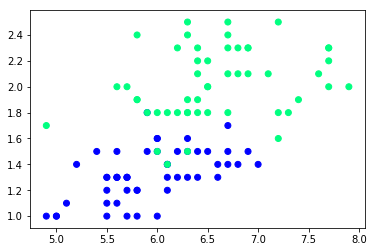

In [3]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap= 'winter')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

In [5]:
from sklearn.svm import SVC
svc = SVC(C=1, kernel='linear', probability= True)

In [6]:
svc.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [7]:
y_pred= svc.predict(x_test)

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [9]:
print(svc.score(x_train, y_train))
svc.score(x_test, y_test)

0.925


1.0

In [10]:
# Let's find the proof of test sample at index 0 belonging to which class
t0 = x_test[0].reshape(1,-1)

In [11]:
svc.predict_proba(t0)

array([[0.81819652, 0.18180348]])

In [12]:
svc.decision_function(t0)

array([-0.65442997])

From both probability and distance it is clearly seen that probability is high w.r.t class 0 and also distance of data is high with negative value that clearly indicate data belong to class 0.

In [13]:
y_test[0]

1

In [14]:
svc.predict(t0)

array([1])

Hence predicted and actual class both are same.

#### Calculating manually:

In [15]:
svc.coef_

array([[0.2159811 , 3.48165879]])

In [16]:
svc.intercept_

array([-6.99742378])

In [17]:
svc.coef_[0]

array([0.2159811 , 3.48165879])

In [22]:
w = svc.coef_[0]
a = -(w[0] / w[1])

In [20]:
w[0], w[1]

(0.21598110357079392, 3.481658793154489)

In [ ]:
x1 = np.linspace(5.0, 8.0, 100)
x2 =  a * x1 + ((-svc.intercept_) / w[1])

In [ ]:
plt.scatter(x[:,0], x[:,1],c = y, cmap='winter')
plt.plot(x1, x2)
plt.title('when C={}'.format(1.0))
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.show()

In [ ]:
for i in [.001, .01, 1, 10]:
    svc = SVC(C=i,kernel='linear', gamma='auto', probability= True)
    svc.fit(x_train, y_train)
    print('when C=',i)
    print (svc.score(x_train, y_train))
    print (svc.score(x_test, y_test))
    w = svc.coef_[0]
    a = -(w[0] / w[1])
    x1 = np.linspace(5.0, 8.0, 100)
    x2 =  a * x1 + ((-svc.intercept_) / w[1])
    plt.scatter(x[:,0], x[:,1],c = y, cmap='winter')
    plt.plot(x1, x2)
    plt.title(f'when C={i}')
    plt.xlabel('feature_1')
    plt.ylabel('feature_2')
    plt.show()
    print()